In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib import patheffects

In [3]:
df = pd.read_csv('df_final_final_foi.csv')

In [4]:
# Agrupando o DataFrame por RPA e trazendo o valor total gasto em cada um
df = df.groupby('rpa').agg({'vlr_final_domicilio':'sum'}).reset_index()

In [5]:
recife_map = gpd.read_file('bairros-polygon.shp')

In [6]:
recife_map.rename(columns={'bairro_nom': 'bairro'}, inplace=True)

In [7]:
recife_map = recife_map[['rpa','geometry']]

In [8]:
# Função "dissolve" do geopandas que agrupa as coordenadas dos bairros e monta uma região
rpa = recife_map.dissolve(by='rpa')

In [9]:
rpa = rpa.merge(df, on='rpa')

In [10]:
rpa

rpa                                           geometry  vlr_final_domicilio
0    1  POLYGON ((-34.88841 -8.08176, -34.88927 -8.082...          12078314.49
1    2  POLYGON ((-34.88680 -8.04043, -34.88680 -8.040...          11298779.09
2    3  POLYGON ((-34.92194 -8.04083, -34.92261 -8.040...          21360116.86
3    4  POLYGON ((-34.93012 -8.06176, -34.93013 -8.061...          17094980.45
4    5  POLYGON ((-34.92787 -8.10244, -34.92806 -8.102...          15734549.25
5    6  POLYGON ((-34.88267 -8.10041, -34.88301 -8.101...          29722208.15

<Axes: >

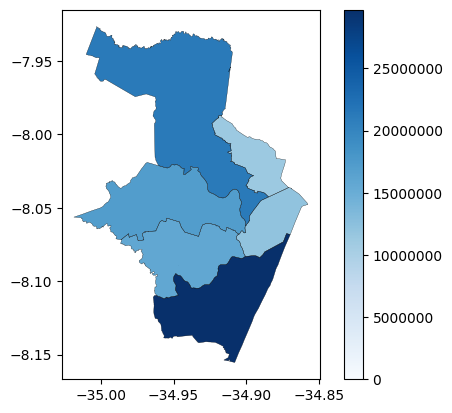

In [11]:
ax = rpa.plot(column='vlr_final_domicilio', legend=True, cmap='Blues',vmin = 0, legend_kwds={'format':"%.0f"})
ax.ticklabel_format(useOffset=False)
rpa.boundary.plot(ax=ax,linewidth=0.2,color='black')

In [12]:
rpa.vlr_final_domicilio = rpa.vlr_final_domicilio.astype(str)

In [13]:
rpa['vlr_final_domicilio']={0: 'R$ 12.078.314,49',
                           1: 'R$ 11.298.779,09',
                           2: 'R$ 21.360.116,86',
                           3: 'R$ 17.094.980,45',
                           4: 'R$ 15.734.549,25',
                           5: 'R$ 29.722.208,15'}

In [49]:
rpa

rpa                                           geometry vlr_final_domicilio
0    1  POLYGON ((-34.88841 -8.08176, -34.88927 -8.082...    R$ 12.078.314,49
1    2  POLYGON ((-34.88680 -8.04043, -34.88680 -8.040...    R$ 11.298.779,09
2    3  POLYGON ((-34.92194 -8.04083, -34.92261 -8.040...    R$ 21.360.116,86
3    4  POLYGON ((-34.93012 -8.06176, -34.93013 -8.061...    R$ 17.094.980,45
4    5  POLYGON ((-34.92787 -8.10244, -34.92806 -8.102...    R$ 15.734.549,25
5    6  POLYGON ((-34.88267 -8.10041, -34.88301 -8.101...    R$ 29.722.208,15

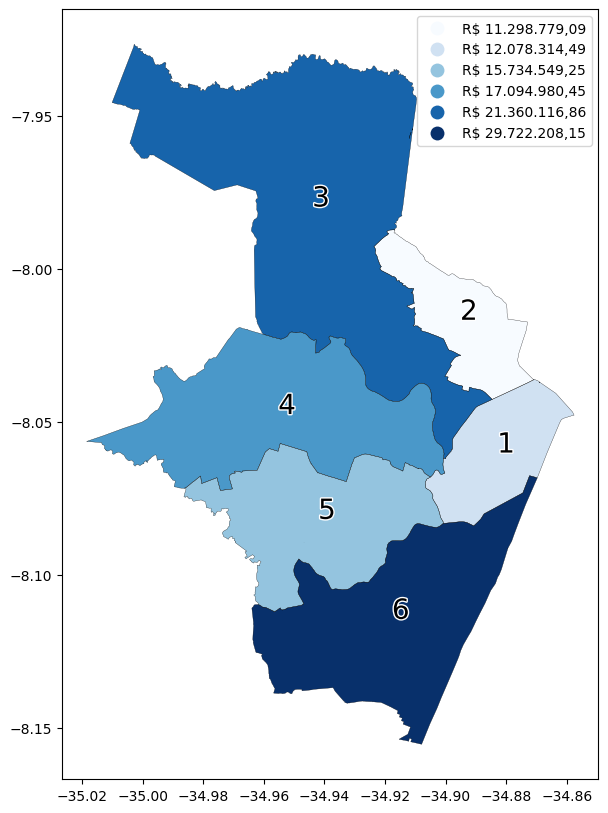

In [18]:
# plot do gráfico em formato de recife
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
rpa.plot(column='vlr_final_domicilio', legend=True, cmap='Blues',vmin = 0, ax = ax)
ax.ticklabel_format(useOffset=False)

# contorno do mapa para poder visualizar melhor as áreas
rpa.boundary.plot(ax=ax,linewidth=0.2,color='black')

# for para poder trazer o número do RPA sobreposto ao mapa
for index, row in rpa.iterrows():
    centroid = row['geometry'].centroid
    outline_effect = [patheffects.withStroke(linewidth=2, foreground="white")]
    ax.annotate(row['rpa'], xy=(centroid.x, centroid.y), color='black', fontsize=20, path_effects=outline_effect)